Sobre o conjunto de dados
O conjunto de dados é construído a partir do conjunto de dados inicial, composto por dados coletados ao longo de 6 anos (período de 2014 a 2019), Classificação Anatômica Terapêutica Química (ATC):

M01AB - Produtos anti-inflamatórios e antirreumáticos,

M01AE - Produtos anti-inflamatórios e antirreumáticos,

N02BA - Outros analgésicos e antipiréticos, ácido salicílico e derivados

N02BE/B - Outros analgésicos e antipiréticos, pirazolonas e anilidas

N05B - Medicamentos psicolepticos, medicamentos ansiolíticos

N05C - Medicamentos psicolepticos, medicamentos hipnóticos e sedativos

R03 - Medicamentos para doenças obstrutivas das vias aéreas

R06 - Antihistamínicos para uso sistêmico




Nosso objetivo é avaliar a venda de diferentes medicamentos, de modo a conseguir capturar alguns insigths importantes como:

1. Quais classes de medicamentos apresentaram aumento ou diminuição de demanda entre 2014 e 2019?
2. Quais os meses com mais e menos vendas?
3. Quais as classes de medicamentos mais e menos vendidos por mês?¶
4. Existe correlação entre a venda mensal de determinadas classes de medicamentos?
5. Relizar previsão de vendas dos medicamenos
6. Realizar prescrição da analise

TRATAMENTO DOS DADOS

In [ ]:
!pip install dash dash-bootstrap-components pandas

In [ ]:
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns


Carregar Dados

In [ ]:
tabela = pd.read_csv('/content/sales mensal.csv')
display(tabela)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [ ]:
# Verificando os tipos de dados
print(tabela.dtypes)

datum     object
M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
dtype: object


Acrescentando coluna mês e Ano na base de dadios

In [ ]:
# Converter a coluna 'datum' para o tipo datetime
tabela['datum'] = pd.to_datetime(tabela['datum'])

# Extrair o mês da coluna 'datum'
tabela['mes'] = tabela['datum'].dt.month

# Criar a coluna 'ano' para representar o ano
tabela['ano'] = tabela['datum'].dt.year

# Definir os títulos das colunas
novos_titulos = ['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']


# Exibir os primeiros registros para verificar a adição da coluna 'ano' e 'mes' como datetime
display(tabela)


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mes,ano
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20,1,2014
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20,2,2014
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40,3,2014
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70,4,2014
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70,5,2014
...,...,...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04,6,2019
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20,7,2019
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30,8,2019
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10,9,2019


In [ ]:
# Salvar a nova tabela em um arquivo CSV
tabela.to_csv('/content/sales_mensal_com_anos.csv', index=False)

print("Nova tabela salva com sucesso!")


Nova tabela salva com sucesso!


Acrescentando a coluna Faturamento na Base

In [ ]:
tabela_nova = pd.read_csv('/content/sales_mensal_com_anos.csv')
display(tabela_nova)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mes,ano
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20,1,2014
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20,2,2014
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40,3,2014
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70,4,2014
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70,5,2014
...,...,...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04,6,2019
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20,7,2019
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30,8,2019
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10,9,2019


In [ ]:
# Verificar valores nulos
print(tabela_nova.isnull().sum())

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
mes      0
ano      0
dtype: int64


In [ ]:
#identificar valores duplicados
tabela_nova.duplicated().sum()


0

In [ ]:
# Verificando os tipos de dados
print(tabela_nova.dtypes)

datum     object
M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
mes        int64
ano        int64
dtype: object


In [ ]:
# Convertendo as colunas 'ano' e 'mes' para float
tabela_nova['ano'] = tabela_nova['ano'].astype(int)
tabela_nova['mes'] = tabela_nova['mes'].astype(int)

 #Verificando os tipos de dados
print(tabela_nova.dtypes)

datum     object
M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
mes        int64
ano        int64
dtype: object


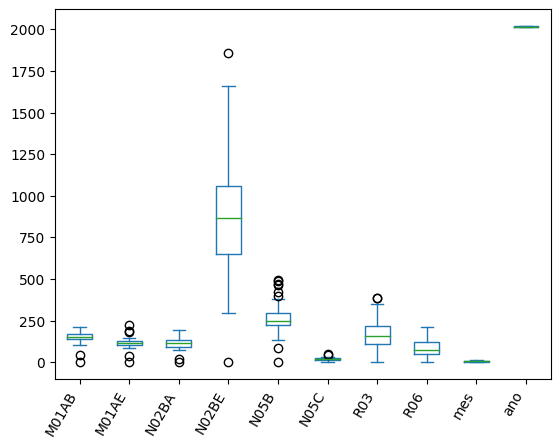

In [ ]:
# verificando outliers
tabela.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()

In [ ]:

# Crie um DataFrame fictício como exemplo

# Criar a coluna de faturamento apenas uma vez
tabela_nova['Faturamento'] = tabela_nova.iloc[:, 1:].sum(axis=1)

# Exibir os primeiros registros para verificar a conversão e a adição da coluna 'Faturamento'
display(tabela_nova)


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mes,ano,Faturamento
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20,1,2014,3836.110
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20,2,2014,3990.470
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40,3,2014,3623.720
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70,4,2014,3447.675
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70,5,2014,3525.303
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04,6,2019,3507.407
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20,7,2019,3543.941
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30,8,2019,3404.779
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10,9,2019,3892.387


ANALISE DESCRITIVA

1)Quais classes de medicamentos apresentaram aumento ou diminuição de demanda entre 2014 e 2019?

In [ ]:
# Calculando classes de medicamentos

# Calculando a média de demanda para o medicamento M01AB por ano
media_M01AB = tabela_nova.groupby('ano')['M01AB'].mean()

# Calculando a média de demanda para o medicamento M01AE por ano
media_M01AE = tabela_nova.groupby('ano')['M01AE'].mean()

# Calculando a média de demanda para o medicamento N02BA por ano
media_N02BA = tabela_nova.groupby('ano')['N02BA'].mean()

# Calculando a média de demanda para o medicamento N02BE por ano
media_N02BE = tabela_nova.groupby('ano')['N02BE'].mean()

# Calculando a média de demanda para o medicamento N05B por ano
media_N05B = tabela_nova.groupby('ano')['N05B'].mean()

# Calculando a média de demanda para o medicamento N05C por ano
media_N05C = tabela_nova.groupby('ano')['N05C'].mean()

# Calculando a média de demanda para o medicamento R03 por ano
media_R03 = tabela_nova.groupby('ano')['R03'].mean()

# Calculando a média de demanda para o medicamento R06 por ano
media_R06 = tabela_nova.groupby('ano')['R06'].mean()


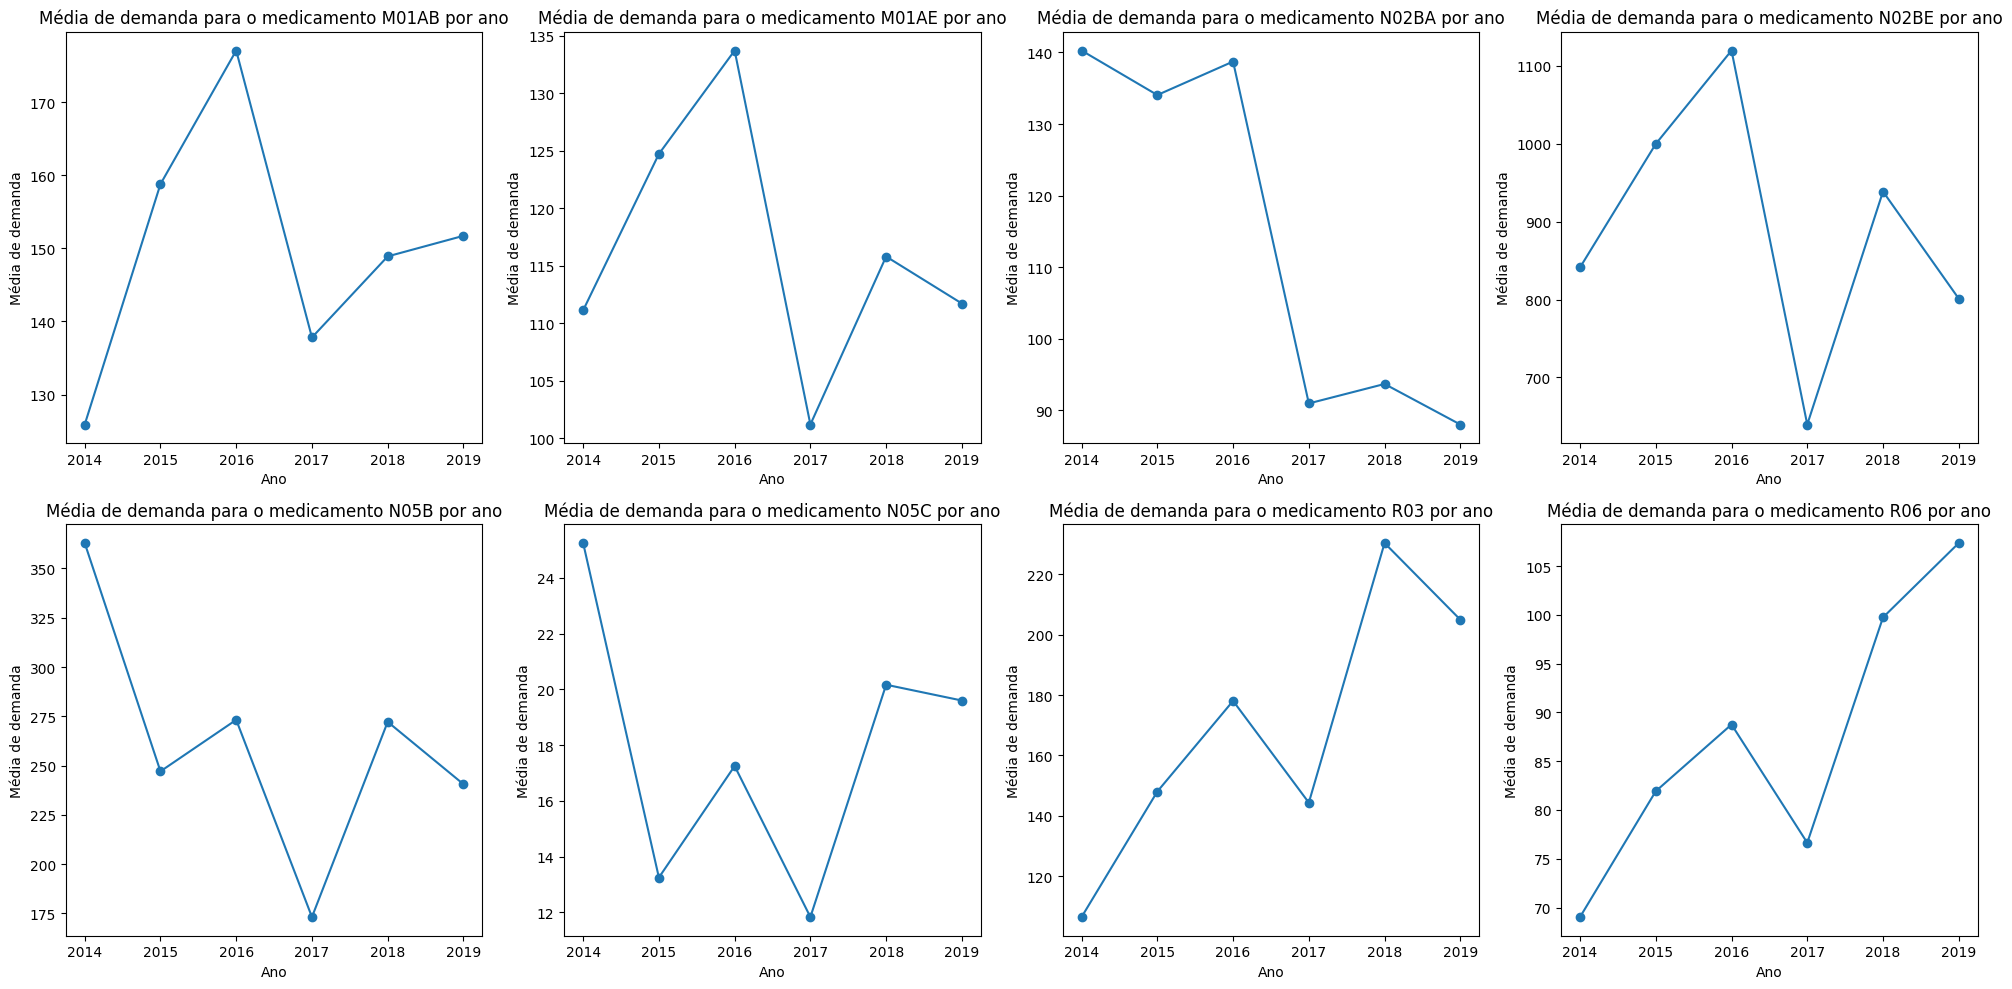

In [ ]:

# Crie uma lista com todas as médias e seus respectivos nomes
medias = [media_M01AB, media_M01AE, media_N02BA, media_N02BE, media_N05B, media_N05C, media_R03, media_R06]
nomes_medicamentos = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Crie uma figura e eixos para os subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Plote os gráficos para cada medicamento
for i, media in enumerate(medias):
    linha = i // 4
    coluna = i % 4
    axs[linha, coluna].plot(media.index, media.values, marker='o', linestyle='-')
    axs[linha, coluna].set_title(f'Média de demanda para o medicamento {nomes_medicamentos[i]} por ano')
    axs[linha, coluna].set_xlabel('Ano')
    axs[linha, coluna].set_ylabel('Média de demanda')

# Ajuste o layout para evitar sobreposição de texto
plt.tight_layout()

# Exiba o gráfico
plt.show()




In [ ]:
# Media de demanda
# Calculando a média de demanda para cada medicamento ao longo dos anos
media_demandas = tabela_nova[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].mean()

# Exibindo os resultados em uma tabela
df_media_demandas = pd.DataFrame(media_demandas, columns=['Média de Demanda'])
display(df_media_demandas)


,Média de Demanda
M01AB,149.992000
M01AE,116.514286
N02BA,115.020843
N02BE,892.542071
N05B,262.118571
N05C,17.842857
R03,167.675000
R06,86.662571


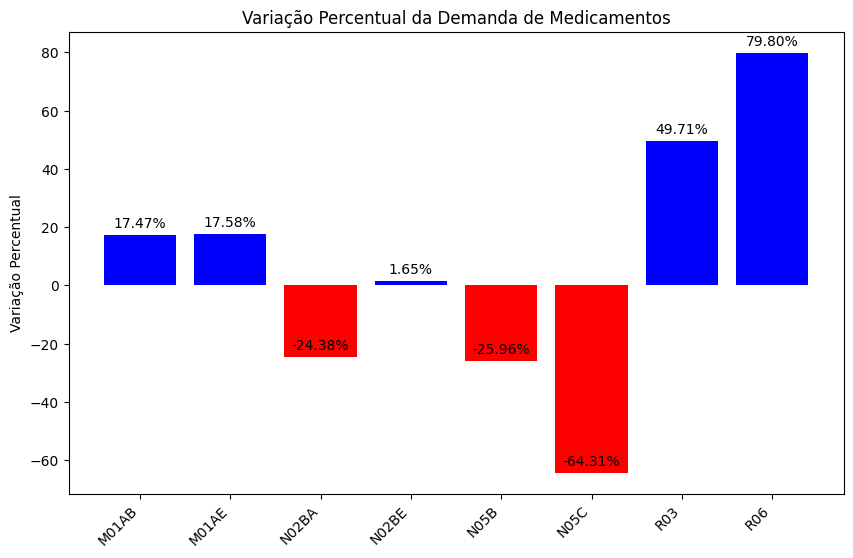

In [ ]:

# Inicializando a lista de resultados
resultados = []

# Verificando se cada medicamento aumentou ou diminuiu sua demanda
for medicamento, demanda_final in media_demandas.items():
    demanda_inicial = tabela_nova.iloc[0][medicamento]  # Demanda no primeiro ano

    if demanda_final > demanda_inicial:
        aumento_percentual = ((demanda_final - demanda_inicial) / demanda_inicial) * 100
        resultados.append((medicamento, aumento_percentual))
    elif demanda_final < demanda_inicial:
        diminuicao_percentual = ((demanda_inicial - demanda_final) / demanda_inicial) * 100
        resultados.append((medicamento, -diminuicao_percentual))
    else:
        resultados.append((medicamento, 0))

# Plotando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário
barras = ax.bar([x[0] for x in resultados], [x[1] for x in resultados], color=['red' if x[1] < 0 else 'blue' for x in resultados])

# Adicionando os valores nas barras
for i, barra in enumerate(barras):
    altura = barra.get_height()
    ax.annotate('{:.2f}%'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Definindo rótulos e título
ax.set_ylabel('Variação Percentual')
ax.set_title('Variação Percentual da Demanda de Medicamentos')
plt.xticks(rotation=45, ha='right')

plt.show()


2)Quais os meses com mais e menos vendas?

In [ ]:
# Mostrando Tabela Nova
display(tabela_nova)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mes,ano,Faturamento
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20,1,2014,3836.110
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20,2,2014,3990.470
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40,3,2014,3623.720
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70,4,2014,3447.675
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70,5,2014,3525.303
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04,6,2019,3507.407
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20,7,2019,3543.941
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30,8,2019,3404.779
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10,9,2019,3892.387


In [ ]:
# Agrupando os dados por ano e mês e somando as vendas
vendas_ano = tabela_nova.groupby(['ano', 'mes']).sum()

# Encontrando o mês com a maior venda para cada ano
max_sales_month = vendas_ano.groupby('ano')['Faturamento'].idxmax()

# Encontrando o mês com a menor venda para cada ano
min_sales_month = vendas_ano.groupby('ano')['Faturamento'].idxmin()


print("Mês com a maior venda por ano:")
print(max_sales_month)

print("\nMês com a menor venda por ano:")
print(min_sales_month)




Mês com a maior venda por ano:
ano
2014    (2014, 10)
2015    (2015, 10)
2016    (2016, 10)
2017    (2017, 10)
2018    (2018, 12)
2019     (2019, 1)
Name: Faturamento, dtype: object

Mês com a menor venda por ano:
ano
2014     (2014, 7)
2015     (2015, 7)
2016     (2016, 7)
2017     (2017, 1)
2018     (2018, 6)
2019    (2019, 10)
Name: Faturamento, dtype: object


<ipython-input-185-d6e40c252222>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:

# Agrupando os dados por ano e mês e somando as vendas
vendas_ano = tabela_nova.groupby(['ano', 'mes']).sum()

# Criando um DataFrame para facilitar a manipulação dos dados
df_vendas = vendas_ano.reset_index()

# Criando o gráfico interativo
fig = go.Figure()

# Adicionando uma linha para cada ano
for ano in df_vendas['ano'].unique():
    df_ano = df_vendas[df_vendas['ano'] == ano]
    fig.add_trace(go.Scatter(x=df_ano['mes'], y=df_ano['Faturamento'], mode='lines+markers', name=str(ano)))

# Adicionando layout ao gráfico
fig.update_layout(title='Vendas ao longo do tempo',
                  xaxis_title='Mês',
                  yaxis_title='Faturamento',
                  legend_title='Ano')

# Exibindo o gráfico
fig.show()


<ipython-input-186-9d2b0007315f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



3) Quais as classes de medicamentos mais e menos vendidos por mês?¶

In [ ]:

# Definindo as colunas de medicamentos
medicamentos = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Calculando a soma de vendas de cada medicamento por mês
vendas_por_mes = tabela_nova.groupby(['mes', 'ano'])[medicamentos].sum()

# Calculando os medicamentos mais e menos vendidos por mês
mais_vendidos_por_mes = vendas_por_mes.idxmax(axis=1)
menos_vendidos_por_mes = vendas_por_mes.idxmin(axis=1)

# Calculando a porcentagem de vendas de cada medicamento
total_vendas = vendas_por_mes.sum(axis=1)
percentual_mais_vendidos = (vendas_por_mes.max(axis=1) / total_vendas) * 100
percentual_menos_vendidos = (vendas_por_mes.min(axis=1) / total_vendas) * 100

# Criando um DataFrame para exibir os resultados como tabela
resultados = pd.DataFrame({
    'Medicamentos mais vendidos': mais_vendidos_por_mes,
    'Porcentagem mais vendidos (%)': percentual_mais_vendidos,
    'Medicamentos menos vendidos': menos_vendidos_por_mes,
    'Porcentagem menos vendidos (%)': percentual_menos_vendidos
})

# Exibindo os resultados como tabela
print("Resultados:")
print(resultados)


Resultados:
         Medicamentos mais vendidos  Porcentagem mais vendidos (%)  \
mes ano                                                              
1   2014                      N02BE                      48.214001   
    2015                      N02BE                      48.394878   
    2016                      N02BE                      60.224299   
    2017                       N05B                     100.000000   
    2018                      N02BE                      57.124663   
...                             ...                            ...   
12  2014                      N02BE                      48.515275   
    2015                      N02BE                      55.364854   
    2016                      N02BE                      61.388067   
    2017                      N02BE                      53.371756   
    2018                      N02BE                      53.301070   

         Medicamentos menos vendidos  Porcentagem menos vendidos (%)  
mes an

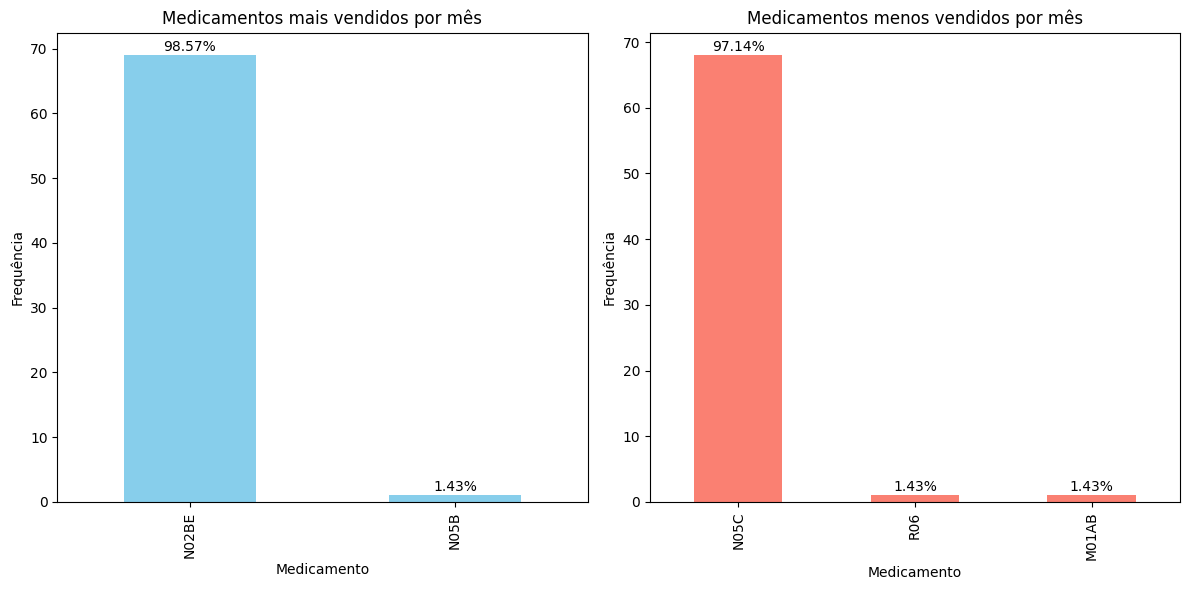

In [ ]:

# Definindo as colunas de medicamentos
medicamentos = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Calculando a soma de vendas de cada medicamento por mês
vendas_por_mes = tabela_nova.groupby(['mes', 'ano'])[medicamentos].sum()

# Calculando os medicamentos mais e menos vendidos por mês
mais_vendidos_por_mes = vendas_por_mes.idxmax(axis=1).value_counts()
menos_vendidos_por_mes = vendas_por_mes.idxmin(axis=1).value_counts()

# Plotando os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
mais_vendidos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Medicamentos mais vendidos por mês')
plt.xlabel('Medicamento')
plt.ylabel('Frequência')

# Adicionando valores em percentual nas barras
for i, v in enumerate(mais_vendidos_por_mes):
    plt.text(i, v + 0.2, f'{round(v / sum(mais_vendidos_por_mes) * 100, 2)}%', ha='center', va='bottom')

plt.subplot(1, 2, 2)
menos_vendidos_por_mes.plot(kind='bar', color='salmon')
plt.title('Medicamentos menos vendidos por mês')
plt.xlabel('Medicamento')
plt.ylabel('Frequência')

# Adicionando valores em percentual nas barras
for i, v in enumerate(menos_vendidos_por_mes):
    plt.text(i, v + 0.2, f'{round(v / sum(menos_vendidos_por_mes) * 100, 2)}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


4) Existe correlação entre a venda mensal de determinadas classes de medicamentos?

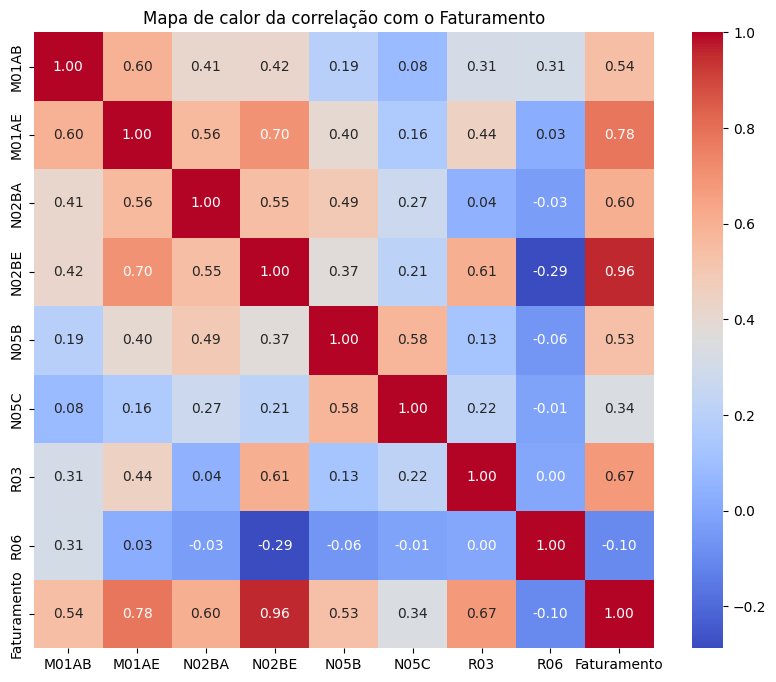

In [ ]:
# Selecionando apenas as colunas de interesse
colunas_interesse = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06', 'Faturamento']
dados_interesse = tabela_nova[colunas_interesse]

# Calculando a matriz de correlação
correlacao_com_faturamento = dados_interesse.corr()

# Plotando o gráfico de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_com_faturamento, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor da correlação com o Faturamento')
plt.show()


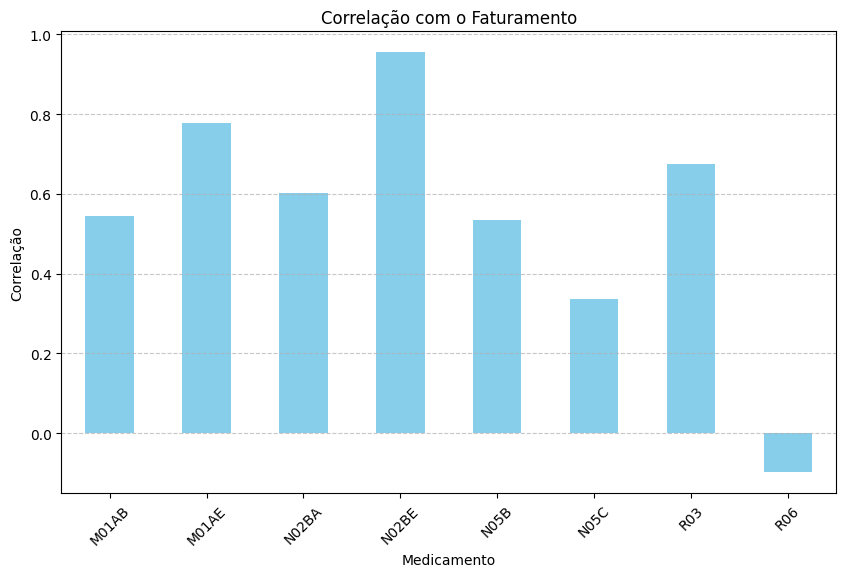

In [ ]:

# Supondo que você tenha um DataFrame chamado 'tabela_nova' com as colunas mencionadas, incluindo 'Faturamento'

# Selecionando apenas as colunas de interesse
colunas_interesse = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06', 'Faturamento']
dados_interesse = tabela_nova[colunas_interesse]

# Calculando a matriz de correlação com relação ao faturamento
correlacao_com_faturamento = dados_interesse.corr()['Faturamento'].drop('Faturamento')

# Plotando o gráfico de barras da correlação com o faturamento
plt.figure(figsize=(10, 6))
correlacao_com_faturamento.plot(kind='bar', color='skyblue')
plt.title('Correlação com o Faturamento')
plt.xlabel('Medicamento')
plt.ylabel('Correlação')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Correlação entre os medicamentos

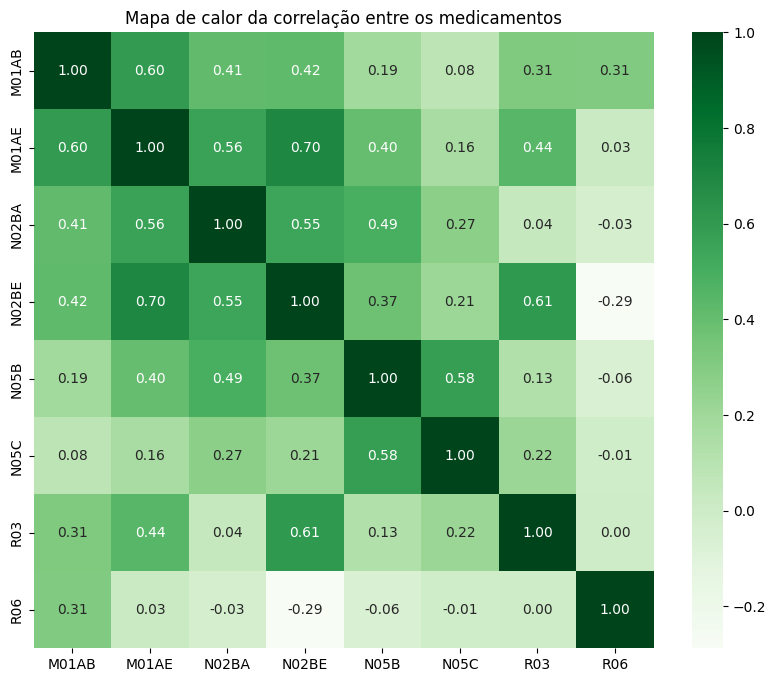

In [ ]:


# Supondo que você tenha um DataFrame chamado 'tabela_nova' com as colunas mencionadas, incluindo 'Faturamento'

# Selecionando apenas as colunas de interesse dos medicamentos
colunas_medicamentos = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
dados_medicamentos = tabela_nova[colunas_medicamentos]

# Calculando a matriz de correlação entre os medicamentos
correlacao_entre_medicamentos = dados_medicamentos.corr()

# Plotando o gráfico de calor da matriz de correlação entre os medicamentos com a cor verde
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_entre_medicamentos, annot=True, cmap='Greens', fmt=".2f")
plt.title('Mapa de calor da correlação entre os medicamentos')
plt.show()




4) Realizar previsão de vendas dos medicamenos


Criando um Modelo de Regressão

In [ ]:

# Supondo que 'tabela' seja o DataFrame que contém as colunas de interesse, incluindo as vendas mensais das classes de medicamentos

# Definir as colunas de recursos
colunas_classes = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Definir a coluna de alvo (vendas totais ou faturamento)
alvo = 'Faturamento'

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(tabela_nova[colunas_classes], tabela_nova[alvo], test_size=0.2, random_state=42)

# Inicializar os modelos de regressão
modelo_linear = LinearRegression()
modelo_arvore = DecisionTreeRegressor()

# Treinar os modelos
modelo_linear.fit(X_train, y_train)
modelo_arvore.fit(X_train, y_train)

# Fazer previsões nos conjuntos de teste
predicoes_linear = modelo_linear.predict(X_test)
predicoes_arvore = modelo_arvore.predict(X_test)

# Avaliar os modelos usando métricas de erro
mae_linear = mean_absolute_error(y_test, predicoes_linear)
mse_linear = mean_squared_error(y_test, predicoes_linear)
mae_arvore = mean_absolute_error(y_test, predicoes_arvore)
mse_arvore = mean_squared_error(y_test, predicoes_arvore)

# Imprimir os resultados
print("Resultados do Modelo de Regressão Linear:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("\nResultados do Modelo de Árvore de Decisão:")
print("MAE:", mae_arvore)
print("MSE:", mse_arvore)



Resultados do Modelo de Regressão Linear:
MAE: 2.8800674003354225
MSE: 12.124753727323192

Resultados do Modelo de Árvore de Decisão:
MAE: 148.49014285714273
MSE: 38956.92976971425


Testando o Modelo

In [ ]:
from sklearn.metrics import r2_score

# Calcular R² para o modelo de regressão linear
r2_linear = r2_score(y_test, predicoes_linear)

# Calcular R² para o modelo de árvore de decisão
r2_arvore = r2_score(y_test, predicoes_arvore)

# Imprimir os resultados
print("\nResultados do Modelo de Regressão Linear:")
print("R²:", r2_linear)
print("\nResultados do Modelo de Árvore de Decisão:")
print("R²:", r2_arvore)



Resultados do Modelo de Regressão Linear:
R²: 0.9999510885227708

Resultados do Modelo de Árvore de Decisão:
R²: 0.8428470362201311


Realizando previsões Futuras

In [ ]:


# Supondo que você tenha um DataFrame chamado 'tabela' com as colunas mencionadas

# Definir as colunas de interesse
colunas_classes = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Somar as vendas mensais das diferentes classes para obter o faturamento total
tabela_nova['faturamento'] = tabela_nova[colunas_classes].sum(axis=1)

# Definir as colunas de recursos
X = tabela_nova[colunas_classes]

# Definir a variável alvo (faturamento)
y = tabela_nova['faturamento']

# Inicializar o modelo de regressão linear
modelo_linear = LinearRegression()

# Treinar o modelo de regressão linear
modelo_linear.fit(X, y)

# Solicitar ao cliente os investimentos em porcentagem para cada classe de medicamento
investimentos_percentuais = {}
for classe in colunas_classes:
    investimentos_percentuais[classe] = float(input(f"Digite o investimento em porcentagem para a classe {classe}: "))

# Converter os investimentos em valores absolutos
vendas_atuais = tabela_nova[colunas_classes].mean()
investimentos_absolutos = {}
for classe, porcentagem in investimentos_percentuais.items():
    investimentos_absolutos[classe] = vendas_atuais[classe] * (1 + porcentagem / 100)

# Fazer previsões de novas vendas com base nos investimentos absolutos
faturamento_previsto = modelo_linear.predict([list(investimentos_absolutos.values())])

# Arredondar o faturamento previsto para duas casas decimais
faturamento_previsto = round(faturamento_previsto[0], 3)

# Imprimir o faturamento previsto
print("Faturamento Previsto:", faturamento_previsto)


Digite o investimento em porcentagem para a classe M01AB: 10
Digite o investimento em porcentagem para a classe M01AE: 10
Digite o investimento em porcentagem para a classe N02BA: 10
Digite o investimento em porcentagem para a classe N02BE: 10
Digite o investimento em porcentagem para a classe N05B: 10
Digite o investimento em porcentagem para a classe N05C: 10
Digite o investimento em porcentagem para a classe R03: 10
Digite o investimento em porcentagem para a classe R06: 10
Faturamento Previsto: 1989.205


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

